In [3]:
import sys
import timeit
import time

import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("../../target/distinct-salinity.tsv", sep='\t', header=None)

In [5]:
df = df.applymap(lambda x: x.strip() if type(x)==str else x)

In [6]:
df

,0,1
0,3377,Missing: Not provided
1,2325,not provided
2,1651,0
3,1032,55 g/L
4,762,NaN
...,...,...
5033,1,38.032
5034,1,34.093
5035,1,36.863
5036,1,33.8 PSU


In [7]:
df.describe()

,0
count,5038.000000
mean,5.851925
std,67.853603
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,3377.000000


In [8]:
df.iloc[:,1]

0       Missing: Not provided
1                not provided
2                           0
3                      55 g/L
4                         NaN
                ...          
5033                   38.032
5034                   34.093
5035                   36.863
5036                 33.8 PSU
5037                  40.7121
Name: 1, Length: 5038, dtype: object

In [9]:
col = df.iloc[:,1]
frame = { 'salinity': col } 
dfcol = pd.DataFrame(frame) 

In [10]:
#check if whitespace trimming worked
df.loc[dfcol['salinity'].astype(str).str.isspace()]

,0,1


In [11]:
def isnum(x):
    try:
        float(x)
        return True
    except:
        return False


In [12]:
dfcol_reals = dfcol.apply(pd.to_numeric, errors='coerce')

In [13]:
dfcol_reals

,salinity
0,NaN
1,NaN
2,0.0000
3,NaN
4,NaN
...,...
5033,38.0320
5034,34.0930
5035,36.8630
5036,NaN


In [14]:
dfcol_reals.describe()

,salinity
count,3232.000000
mean,163.782794
std,3351.342712
min,-999.000000
25%,28.627500
50%,34.435650
75%,35.763225
max,164045.000000


In [15]:
dfcol_reals_descr = dfcol_reals.describe()
reals = dfcol_reals_descr.loc['count',]
#type(dfcol_reals)

dfcol_str = dfcol



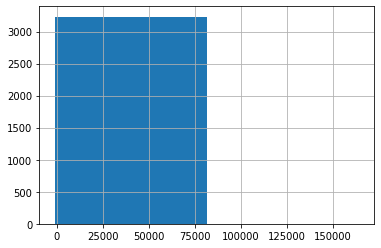

In [16]:
dfcol_reals['salinity'].hist(bins=2)

In [17]:
dfcol_reals[dfcol_reals['salinity'] < 0]

,salinity
40,-999.0


In [18]:
dfcol_reals[dfcol_reals['salinity'] > 100]

,salinity
18,999.000000
524,228.140000
576,228.000000
613,18741.000000
710,200.000000
...,...
4721,342.400000
4821,290.150000
4915,340.000000
4920,281.150000


In [19]:
dfcol_reals[(dfcol_reals['salinity'] < 100) & (dfcol_reals['salinity'] > 0)]

,salinity
7,35.0000
9,32.0000
10,34.0000
19,28.0000
22,0.1100
...,...
5031,32.4900
5033,38.0320
5034,34.0930
5035,36.8630


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1089b1a90>]],
      dtype=object)

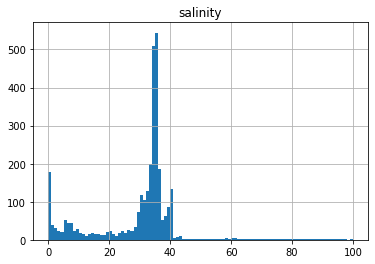

In [20]:
dfcol_reals[(dfcol_reals['salinity'] < 100) & (dfcol_reals['salinity'] > 0)].hist(bins=100)

In [21]:
dfcol

,salinity
0,Missing: Not provided
1,not provided
2,0
3,55 g/L
4,NaN
...,...
5033,38.032
5034,34.093
5035,36.863
5036,33.8 PSU


In [22]:
#dfcol_realmap = dfcol_reals.applymap(np.isreal)

dfcol.loc[dfcol['salinity'].astype(str).str.isalpha()]

,salinity
4,NaN
5,missing
20,NaN
25,NaN
28,Halophile
41,Unknown
88,FW
91,Halotolerant
409,nd
990,Stenohaline


In [23]:
dfcol.loc[~dfcol['salinity'].astype(str).str.isdigit() & (dfcol['salinity'].str.find(".")) ]

,salinity
0,Missing: Not provided
1,not provided
3,55 g/L
5,missing
6,not collected
...,...
5033,38.032
5034,34.093
5035,36.863
5036,33.8 PSU


In [24]:
dfcol.loc[dfcol['salinity'].astype(str).str.isalnum() | dfcol['salinity'].astype(str).str.isalpha()]

,salinity
2,0
4,NaN
5,missing
7,35
9,32
...,...
4674,54
4830,51
4857,73
4915,340


In [25]:
unitindex = dfcol['salinity'].str.contains("/")
unitindex[unitindex.isnull()] = "False"
type(unitindex)
unitindex.name = 'salinity'
unitindex

0       False
1       False
2       False
3        True
4       False
        ...  
5033    False
5034    False
5035    False
5036    False
5037    False
Name: salinity, Length: 5038, dtype: object

In [26]:
dfcol['salinity'].where(dfcol['salinity'].str.contains("/") | dfcol['salinity'].str.contains("%")).dropna()

3                  55 g/L
11                 400g/L
12                  70g/L
13                 110g/L
17                 100g/L
              ...        
4829              120 g/L
4855               0-35 %
4894    2.0 percent (w/v)
4897               27 g/L
4988              6.6 g/L
Name: salinity, Length: 172, dtype: object

In [27]:
values_w_units = dfcol['salinity'].where(dfcol['salinity'].str.contains("/") | dfcol['salinity'].str.contains("%") | dfcol['salinity'].str.contains("percent") | dfcol['salinity'].str.contains("psu")).dropna()

In [28]:
len(values_w_units)

724

In [339]:
def pick_numeric_vs_wunit(instr):
    if instr is None:
        return None
    else:
        #print("start")
        #spa_ind = instr.find(" ")
        #print(spa_ind)
        #if(spa_ind != -1):
        #    try:
        #        return float(instr[0 : spa_ind])     
        #    except:
        #        print("FAILED not float")
        #else:
        #
        #^0$|^[1-9]\d*$|^\.\d+$|^0\.\d*$|^[1-9]\d*\.\d*$
        #digits = re.match("([0-9]*)",instr).groups()[0]
        #digits = re.match("(\d+\.?\d*)",instr)
        #(^[+-]?(([0-9]*)?[0-9](\.[0-9]*)?|\.[0-9]+))
        digits_matches = re.match("(^[+-]?(([0-9]+)?\.([0-9]+)))",instr)#?\d+*
        digits_w_string_matches = re.match("(^[+-]?(([0-9]+)?\.([0-9]+))*)", instr)#r'\D'
        
        #try:
        char_ind = re.search(r"\D", instr)#instr.index("/\D/")
        spa_ind = re.search(r" ", instr)
        perc_ind = re.search(r"%", instr)
        if(spa_ind is None):
            if(perc_ind is not None):
               spa_ind =perc_ind
        char_span = ()
        spa_span = ()
        try:
            char_span = char_ind.span()
            print("char_ind %s ",char_ind)
            print("char_span %s ",char_span)            
            print("0 %s ",char_span[0])
        except:
            print("char_span failed")

        try:
            spa_span = spa_ind.span()
            print("spa_ind %s ",spa_ind)
            print("spa_span %s ",spa_span)         
            print("0 %s ",spa_span[0])
        except:
            print("spa_span failed")                      

        if len(spa_span) > 0:                
            number = instr[0:(spa_span[0])]
            string = instr[(spa_span[0]+1):]                
        elif len(char_span) > 0:
            number = instr[0:(char_span[0])]
            string = instr[(char_span[0]):]

        print("number, string %s %s ",number ,string)

        return (instr.lower(), number, string.lower(), instr)

        #except:
        #    print("NO ",instr)
        

success = 0
split_values_w_units = []

for string in values_w_units:
    print(string)
    result = pick_numeric_vs_wunit(string)
    if result is not None:
        print("Matched : %s %s ".format(result, string))
        success = success + 1
        split_values_w_units.append(result)
        
print("success %s",success)

55 g/L
char_ind %s  <re.Match object; span=(2, 3), match=' '>
char_span %s  (2, 3)
0 %s  2
spa_ind %s  <re.Match object; span=(2, 3), match=' '>
spa_span %s  (2, 3)
0 %s  2
number, string %s %s  55 g/L
Matched : %s %s 
400g/L
char_ind %s  <re.Match object; span=(3, 4), match='g'>
char_span %s  (3, 4)
0 %s  3
spa_span failed
number, string %s %s  400 g/L
Matched : %s %s 
70g/L
char_ind %s  <re.Match object; span=(2, 3), match='g'>
char_span %s  (2, 3)
0 %s  2
spa_span failed
number, string %s %s  70 g/L
Matched : %s %s 
110g/L
char_ind %s  <re.Match object; span=(3, 4), match='g'>
char_span %s  (3, 4)
0 %s  3
spa_span failed
number, string %s %s  110 g/L
Matched : %s %s 
100g/L
char_ind %s  <re.Match object; span=(3, 4), match='g'>
char_span %s  (3, 4)
0 %s  3
spa_span failed
number, string %s %s  100 g/L
Matched : %s %s 
1%
char_ind %s  <re.Match object; span=(1, 2), match='%'>
char_span %s  (1, 2)
0 %s  1
spa_ind %s  <re.Match object; span=(1, 2), match='%'>
spa_span %s  (1, 2)
0 %s  

spa_ind %s  <re.Match object; span=(5, 6), match=' '>
spa_span %s  (5, 6)
0 %s  5
number, string %s %s  37.12 psu
Matched : %s %s 
33.89 psu
char_ind %s  <re.Match object; span=(2, 3), match='.'>
char_span %s  (2, 3)
0 %s  2
spa_ind %s  <re.Match object; span=(5, 6), match=' '>
spa_span %s  (5, 6)
0 %s  5
number, string %s %s  33.89 psu
Matched : %s %s 
38.129 psu
char_ind %s  <re.Match object; span=(2, 3), match='.'>
char_span %s  (2, 3)
0 %s  2
spa_ind %s  <re.Match object; span=(6, 7), match=' '>
spa_span %s  (6, 7)
0 %s  6
number, string %s %s  38.129 psu
Matched : %s %s 
37.28 psu
char_ind %s  <re.Match object; span=(2, 3), match='.'>
char_span %s  (2, 3)
0 %s  2
spa_ind %s  <re.Match object; span=(5, 6), match=' '>
spa_span %s  (5, 6)
0 %s  5
number, string %s %s  37.28 psu
Matched : %s %s 
32.36 psu
char_ind %s  <re.Match object; span=(2, 3), match='.'>
char_span %s  (2, 3)
0 %s  2
spa_ind %s  <re.Match object; span=(5, 6), match=' '>
spa_span %s  (5, 6)
0 %s  5
number, string %

char_ind %s  <re.Match object; span=(2, 3), match='.'>
char_span %s  (2, 3)
0 %s  2
spa_ind %s  <re.Match object; span=(5, 6), match=' '>
spa_span %s  (5, 6)
0 %s  5
number, string %s %s  35.61 psu
Matched : %s %s 
23.47 psu
char_ind %s  <re.Match object; span=(2, 3), match='.'>
char_span %s  (2, 3)
0 %s  2
spa_ind %s  <re.Match object; span=(5, 6), match=' '>
spa_span %s  (5, 6)
0 %s  5
number, string %s %s  23.47 psu
Matched : %s %s 
19.17 psu
char_ind %s  <re.Match object; span=(2, 3), match='.'>
char_span %s  (2, 3)
0 %s  2
spa_ind %s  <re.Match object; span=(5, 6), match=' '>
spa_span %s  (5, 6)
0 %s  5
number, string %s %s  19.17 psu
Matched : %s %s 
2.4 g/L
char_ind %s  <re.Match object; span=(1, 2), match='.'>
char_span %s  (1, 2)
0 %s  1
spa_ind %s  <re.Match object; span=(3, 4), match=' '>
spa_span %s  (3, 4)
0 %s  3
number, string %s %s  2.4 g/L
Matched : %s %s 
5.03 psu
char_ind %s  <re.Match object; span=(1, 2), match='.'>
char_span %s  (1, 2)
0 %s  1
spa_ind %s  <re.Match

0 %s  5
number, string %s %s  34.16 psu
Matched : %s %s 
17.73 psu
char_ind %s  <re.Match object; span=(2, 3), match='.'>
char_span %s  (2, 3)
0 %s  2
spa_ind %s  <re.Match object; span=(5, 6), match=' '>
spa_span %s  (5, 6)
0 %s  5
number, string %s %s  17.73 psu
Matched : %s %s 
1.98 psu
char_ind %s  <re.Match object; span=(1, 2), match='.'>
char_span %s  (1, 2)
0 %s  1
spa_ind %s  <re.Match object; span=(4, 5), match=' '>
spa_span %s  (4, 5)
0 %s  4
number, string %s %s  1.98 psu
Matched : %s %s 
18.25 psu
char_ind %s  <re.Match object; span=(2, 3), match='.'>
char_span %s  (2, 3)
0 %s  2
spa_ind %s  <re.Match object; span=(5, 6), match=' '>
spa_span %s  (5, 6)
0 %s  5
number, string %s %s  18.25 psu
Matched : %s %s 
18.45 psu
char_ind %s  <re.Match object; span=(2, 3), match='.'>
char_span %s  (2, 3)
0 %s  2
spa_ind %s  <re.Match object; span=(5, 6), match=' '>
spa_span %s  (5, 6)
0 %s  5
number, string %s %s  18.45 psu
Matched : %s %s 
5.18 psu
char_ind %s  <re.Match object; span=

0 %s  1
spa_ind %s  <re.Match object; span=(4, 5), match=' '>
spa_span %s  (4, 5)
0 %s  4
number, string %s %s  6.19 psu
Matched : %s %s 
18.02 psu
char_ind %s  <re.Match object; span=(2, 3), match='.'>
char_span %s  (2, 3)
0 %s  2
spa_ind %s  <re.Match object; span=(5, 6), match=' '>
spa_span %s  (5, 6)
0 %s  5
number, string %s %s  18.02 psu
Matched : %s %s 
31.55 psu
char_ind %s  <re.Match object; span=(2, 3), match='.'>
char_span %s  (2, 3)
0 %s  2
spa_ind %s  <re.Match object; span=(5, 6), match=' '>
spa_span %s  (5, 6)
0 %s  5
number, string %s %s  31.55 psu
Matched : %s %s 
42.03 psu
char_ind %s  <re.Match object; span=(2, 3), match='.'>
char_span %s  (2, 3)
0 %s  2
spa_ind %s  <re.Match object; span=(5, 6), match=' '>
spa_span %s  (5, 6)
0 %s  5
number, string %s %s  42.03 psu
Matched : %s %s 
35.84 psu
char_ind %s  <re.Match object; span=(2, 3), match='.'>
char_span %s  (2, 3)
0 %s  2
spa_ind %s  <re.Match object; span=(5, 6), match=' '>
spa_span %s  (5, 6)
0 %s  5
number, str

char_span %s  (1, 2)
0 %s  1
spa_ind %s  <re.Match object; span=(4, 5), match=' '>
spa_span %s  (4, 5)
0 %s  4
number, string %s %s  0.48 g/l
Matched : %s %s 
3.2 percent (w/v)
char_ind %s  <re.Match object; span=(1, 2), match='.'>
char_span %s  (1, 2)
0 %s  1
spa_ind %s  <re.Match object; span=(3, 4), match=' '>
spa_span %s  (3, 4)
0 %s  3
number, string %s %s  3.2 percent (w/v)
Matched : %s %s 
39%
char_ind %s  <re.Match object; span=(2, 3), match='%'>
char_span %s  (2, 3)
0 %s  2
spa_ind %s  <re.Match object; span=(2, 3), match='%'>
spa_span %s  (2, 3)
0 %s  2
number, string %s %s  39 
Matched : %s %s 
9.1 g/L
char_ind %s  <re.Match object; span=(1, 2), match='.'>
char_span %s  (1, 2)
0 %s  1
spa_ind %s  <re.Match object; span=(3, 4), match=' '>
spa_span %s  (3, 4)
0 %s  3
number, string %s %s  9.1 g/L
Matched : %s %s 
0.2 g/L
char_ind %s  <re.Match object; span=(1, 2), match='.'>
char_span %s  (1, 2)
0 %s  1
spa_ind %s  <re.Match object; span=(3, 4), match=' '>
spa_span %s  (3, 4)


0 %s  3
number, string %s %s  120 g/L
Matched : %s %s 
0-35 %
char_ind %s  <re.Match object; span=(1, 2), match='-'>
char_span %s  (1, 2)
0 %s  1
spa_ind %s  <re.Match object; span=(4, 5), match=' '>
spa_span %s  (4, 5)
0 %s  4
number, string %s %s  0-35 %
Matched : %s %s 
2.0 percent (w/v)
char_ind %s  <re.Match object; span=(1, 2), match='.'>
char_span %s  (1, 2)
0 %s  1
spa_ind %s  <re.Match object; span=(3, 4), match=' '>
spa_span %s  (3, 4)
0 %s  3
number, string %s %s  2.0 percent (w/v)
Matched : %s %s 
27 g/L
char_ind %s  <re.Match object; span=(2, 3), match=' '>
char_span %s  (2, 3)
0 %s  2
spa_ind %s  <re.Match object; span=(2, 3), match=' '>
spa_span %s  (2, 3)
0 %s  2
number, string %s %s  27 g/L
Matched : %s %s 
38.0812 psu
char_ind %s  <re.Match object; span=(2, 3), match='.'>
char_span %s  (2, 3)
0 %s  2
spa_ind %s  <re.Match object; span=(7, 8), match=' '>
spa_span %s  (7, 8)
0 %s  7
number, string %s %s  38.0812 psu
Matched : %s %s 
35.12 psu
char_ind %s  <re.Match obje

In [340]:
print(values_w_units.sort_values(ascending=True))

593                &gt;50%
169                    0 %
1195                 0 psu
2517    0 psu (freshwater)
4593              0 to 9 %
               ...        
3586            {1.03} {%}
2672            {16.6} {%}
2803            {19.1} {%}
2304            {19.4} {%}
4671            {4.76} {%}
Name: salinity, Length: 724, dtype: object


In [341]:
split_values_w_units

[('55 g/l', '55', 'g/l', '55 g/L'),
 ('400g/l', '400', 'g/l', '400g/L'),
 ('70g/l', '70', 'g/l', '70g/L'),
 ('110g/l', '110', 'g/l', '110g/L'),
 ('100g/l', '100', 'g/l', '100g/L'),
 ('1%', '1', '', '1%'),
 ('0.05 psu', '0.05', 'psu', '0.05 psu'),
 ('0.19 psu', '0.19', 'psu', '0.19 psu'),
 ('4%', '4', '', '4%'),
 ('0.2 psu', '0.2', 'psu', '0.2 psu'),
 ('6 g/l', '6', 'g/l', '6 g/L'),
 ('36.75 psu', '36.75', 'psu', '36.75 psu'),
 ('36.6 psu', '36.6', 'psu', '36.6 psu'),
 ('2 %', '2', '%', '2 %'),
 ('0.04 psu', '0.04', 'psu', '0.04 psu'),
 ('36.58 psu', '36.58', 'psu', '36.58 psu'),
 ('0.09 psu', '0.09', 'psu', '0.09 psu'),
 ('36.74 psu', '36.74', 'psu', '36.74 psu'),
 ('0.07 psu', '0.07', 'psu', '0.07 psu'),
 ('0.11 psu', '0.11', 'psu', '0.11 psu'),
 ('0/na', '0', '/na', '0/NA'),
 ('0 %', '0', '%', '0 %'),
 ('36.7 psu', '36.7', 'psu', '36.7 psu'),
 ('0.12 psu', '0.12', 'psu', '0.12 psu'),
 ('5.451 psu', '5.451', 'psu', '5.451 psu'),
 ('5.863 psu', '5.863', 'psu', '5.863 psu'),
 ('5.548 ps

In [342]:

#def split_num_str(s):
#    return list(filter(None, re.split(r'(\d+\.?\d+)', s)))

#store = []
#for string in values_w_units:
#    print(string)
#    split = split_num_str(string)
#    print(split)
#    if(len(split) == 2):
#        store.append(split)


#value_unit_df = pd.DataFrame(store, columns = ['value', 'unit']) 
df_values_wunits = pd.DataFrame(split_values_w_units, columns =['full', 'value', 'unit','original']) 


In [343]:
df_values_wunits.describe()

,full,value,unit,original
count,724,724,724,724
unique,724,680,21,724
top,34.86 psu,0,psu,34.86 psu
freq,1,6,551,1


In [345]:
df_values_wunits

,full,value,unit,original
0,55 g/l,55,g/l,55 g/L
1,400g/l,400,g/l,400g/L
2,70g/l,70,g/l,70g/L
3,110g/l,110,g/l,110g/L
4,100g/l,100,g/l,100g/L
...,...,...,...,...
719,35.1894 psu,35.1894,psu,35.1894 psu
720,6.6 g/l,6.6,g/l,6.6 g/L
721,0.3 psu,0.3,psu,0.3 psu
722,31.5688 psu,31.5688,psu,31.5688 psu


In [346]:
unit_list = df_values_wunits['unit'].unique()

In [347]:
unit_list

array(['g/l', '', 'psu', '%', '/na', 'ds/m', 'g/dm3', 'nacl', '{%}',
       'percent (w/v)', 'mg/kg', '(optimum at 3.5%)', 'psu (freshwater)',
       'mg/l', '-60g/l', '0 - 3% (w/v)', 'us/cm', '240-300 g/l',
       '100-400 g/l', 'of nacl (optimum, 3-4%)', 'to 9 %'], dtype=object)

In [348]:
type(unit_list)

numpy.ndarray

In [349]:
# map(lambda x: x.strip(), unit_list)
    
unit_list = [x.strip() for x in unit_list]
unit_list_lower = [x.lower() for x in unit_list]
unit_list_lower = list(set(unit_list_lower))

print(unit_list_lower)

['', 'to 9 %', 'psu', '/na', 'mg/kg', 'of nacl (optimum, 3-4%)', 'ds/m', 'g/l', 'us/cm', 'nacl', 'psu (freshwater)', 'mg/l', '-60g/l', '(optimum at 3.5%)', '%', 'g/dm3', '0 - 3% (w/v)', '240-300 g/l', 'percent (w/v)', '{%}', '100-400 g/l']


In [350]:
###first mapping pass

mg/L * 1000 = g/L
g/l = g/L
g/L = g/L
g/dm3 = g/L
mg/kg = g/L
dS/m =
percent (w/v) =


SyntaxError: invalid syntax (<ipython-input-350-52091aa1e6a9>, line 8)

In [351]:

sum = 0

salinity_lower = dfcol['salinity'].str.lower()
for i in range(0,len(unit_list_lower)):

    #indices = np.where(dfcol['salinity'].isin([unit_list[i]]))
    #print(unit_list[i])
    #print(len(indices))
    #print(indices)
    
    #print(df[(df==unit_list[i])].dropna(how='all').index)
    
    print(unit_list_lower[i])
    results = salinity_lower[salinity_lower.str.contains(unit_list_lower[i], na=False)]
    lenr = len(results)
    sum = sum + lenr
    print(lenr)
    #print(results)
    
    

print("sum %s len(dfcol['salinity']) %s covered %s " % (sum, len(dfcol['salinity']), (sum/len(dfcol['salinity']))))
    


5035
to 9 %
1
psu
993
/na
1
mg/kg
2
of nacl (optimum, 3-4%)
0
ds/m
10
g/l
49
us/cm
1
nacl
8
psu (freshwater)
0
mg/l
2
-60g/l
1
(optimum at 3.5%)
3
%
77
g/dm3
14
0 - 3% (w/v)
0
240-300 g/l
1
percent (w/v)
0
{%}
8
100-400 g/l
1
sum 6207 len(dfcol['salinity']) 5038 covered 1.2320365224295355 


/Users/marcin/Library/Python/3.7/lib/python/site-packages/pandas-1.0.1-py3.7-macosx-10.9-x86_64.egg/pandas/core/strings.py:1952: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [352]:
salinity_lower

0       missing: not provided
1                not provided
2                           0
3                      55 g/l
4                         NaN
                ...          
5033                   38.032
5034                   34.093
5035                   36.863
5036                 33.8 psu
5037                  40.7121
Name: salinity, Length: 5038, dtype: object

In [353]:
col = df.iloc[:,1]
frame = { 'salinity': col } 
dfcol = pd.DataFrame(frame) 
dfcol_reals = dfcol.apply(pd.to_numeric, errors='coerce')
#dfcol_reals.describe(include='all')
real_na = dfcol_reals.isna().sum()
real_len = len(dfcol_reals)
print("na %s ", real_na)
print("real %s ", real_len - real_na)
print("total %s ",)

na %s  salinity    1806
dtype: int64
real %s  salinity    3232
dtype: int64
total %s 


In [354]:
dfcol['salinity']

0       Missing: Not provided
1                not provided
2                           0
3                      55 g/L
4                         NaN
                ...          
5033                   38.032
5034                   34.093
5035                   36.863
5036                 33.8 PSU
5037                  40.7121
Name: salinity, Length: 5038, dtype: object

In [355]:
dfcol_lower = dfcol["salinity"].str.lower()#map(lambda x: x.lower() if(x == str)  else x)
dfcol_lower

0       missing: not provided
1                not provided
2                           0
3                      55 g/l
4                         NaN
                ...          
5033                   38.032
5034                   34.093
5035                   36.863
5036                 33.8 psu
5037                  40.7121
Name: salinity, Length: 5038, dtype: object

In [356]:
#salinity
#4	NaN
#5	missing
#20	NaN
#25	NaN
#28	Halophile
#41	Unknown
#88	FW
#91	Halotolerant
#409	nd
#990	Stenohaline
#2147	unknown
#3061	xx
#3647	Original

#Halophile, FW, Halotolerant, Stenohaline
missing_strings = ["missing: not provided", "not provided", "none", "missing","unknown","nd","xx","NaN"]
print("NA %s", dfcol_lower.isna().sum())
i = 0
len_now = len(missing_strings)
for i in range(0,len_now):
    print(missing_strings[i])
    dfNone = dfcol_lower.str.match(missing_strings[i])
    #dfNone[dfNone == np.NaN] = False
    print(len(dfNone))
    print(dfNone.value_counts())
    #dfcol_lower[dfNone] = np.NaN

NA %s 3
missing: not provided
5038
False    5033
True        2
Name: salinity, dtype: int64
not provided
5038
False    5034
True        1
Name: salinity, dtype: int64
none
5038
False    5035
Name: salinity, dtype: int64
missing
5038
False    5030
True        5
Name: salinity, dtype: int64
unknown
5038
False    5033
True        2
Name: salinity, dtype: int64
nd
5038
False    5034
True        1
Name: salinity, dtype: int64
xx
5038
False    5034
True        1
Name: salinity, dtype: int64
NaN
5038
False    5035
Name: salinity, dtype: int64


In [357]:
dfcol_lower

0       missing: not provided
1                not provided
2                           0
3                      55 g/l
4                         NaN
                ...          
5033                   38.032
5034                   34.093
5035                   36.863
5036                 33.8 psu
5037                  40.7121
Name: salinity, Length: 5038, dtype: object

In [358]:

#'g/dm3', 'mg/l', '.80%', 'to 9 %', '.5%', '-60g/l', '-16.3%', 'mg/kg',
#'us/cm', '-17%', 'of nacl (optimum, 3-4%)', '(optimum at 3.5%)',
#'100-400 g/l', '240-300 g/l', 'nacl', 'ds/m', 'g/l', '%', '&gt;50%',
#'.4-27.6%', '.90%', 'percent (w/v)', '.64%', '/na', '-32%', 'psu (freshwater)',
#'{%}', '0 - 3% (w/v)', '.4%', 'psu', '.87%'

#mg/l * 1000 = g/l
#g/dm3 = g/l
#mg/kg = g/l
#dS/m = g/l
#percent (w/v) = Liquid? Solid (dry weight)? = g / 100 mL = 10 * g/L
#psu = mg/kg * 1000 = g/l
#us/cm = us/cm * 100 = dS/m = g/l

def g_per_l__to__g_per_l(x):
    ret_val = x
    print("g/l to g/l %s %s",x, ret_val)
    return str(ret_val)

def mg_per_l__to__g_per_l(x):
    ret_val = x * 1000
    print("mg/l to g/l %s %s",x, ret_val)
    return str(ret_val)

def g_per_dm3__to__g_per_l(x):
    ret_val = x
    print("g/dm3 to g/l %s %s",x, ret_val)
    return str(x)

def mg_per_kg__to__g_per_l(x):
    ret_val = x * 1000
    print("mg/kg to g/l %s %s",x, ret_val)
    return str(ret_val)

def ds_per_m__to__g_per_l(x):
    ret_val = x * 550
    print("float/m to g/l %s %s",x, ret_val)
    return str(ret_val)
#https://landscape.sa.gov.au/mr/publications/measuring-salinity

def us_per_m__to__g_per_l(x):
    ret_val = x * 100 * 550    
    print("us/m to g/l %s %s",x, ret_val)
    return str(ret_val)
#https://extension.umd.edu/learn/how-interpret-salinity-test-results

def percent__to__g_per_l(x):
    ret_val = x * 10
    print("% to g/l %s %s",x, ret_val)
    return str(ret_val)
def percent_nacl__to__g_per_l(x):
    ret_val = x * 10
    print("%nacl %s %s",x, ret_val)
    return str(ret_val)
def percent_w_by_v__to__g_per_l(x):
    ret_val = x * 10
    print("% w/v %s %s",x, ret_val)
    return str(ret_val)
#https://www.labce.com/spg913555_calculating_percent_weightvolume__wv.aspx

def psu__to__g_per_l(x):
    ret_val = x
    print("psu to g/l %s %s",x, ret_val)
    return str(ret_val)
#http://www.salinityremotesensing.ifremer.fr/sea-surface-salinity/definition-and-units

#unit_list_lower
unit_list_lower =['%',
 'mg/kg',
 '%+ nacl',
 'percent (w/v)',
 'g/l',
 'ds/m',
 #'-4 %',
 'mg/l',
 'g/dm3',
  'psu']

unit_percent = ['%',
 '%+ nacl',
 'percent (w/v)']

type(unit_list_lower)

list

In [359]:
unit_list_lower

['%',
 'mg/kg',
 '%+ nacl',
 'percent (w/v)',
 'g/l',
 'ds/m',
 'mg/l',
 'g/dm3',
 'psu']

In [360]:
#for unit in unit_list_lower:
#    #dfcol_lower_new = lambda x: dfcol_lower[dfcol_lower.str.find(unit)]
#    if(unit in unit_percent):
#        dfcol_lower.str.find(unit).map(lambda x: percent__to__g_per_l(x),
#            na_action='ignore')
#    elif(unit in ['mg/kg', 'mg/l']):
#        dfcol_lower.str.find(unit).map(lambda x: mg_per_kg__to__g_per_l(x),
#            na_action='ignore')
#    elif(unit in ['ds/m']):
#        dfcol_lower.str.find(unit).map(lambda x: ds_per_m__to__g_per_l(x),
#            na_action='ignore')
#    elif(unit in ['us/cm']):
#        dfcol_lower.str.find(unit).map(lambda x: us_per_m__to__g_per_l(x),
#            na_action='ignore')
#    elif(unit in ['g/dm3']):
#        dfcol_lower.str.find(unit).map(lambda x: g_per_dm3__to__g_per_l(x),
#            na_action='ignore')
#    elif(unit in ['psu']):
#        dfcol_lower.str.find(unit).map(lambda x: psu__to__g_per_l(x),
#            na_action='ignore')

In [361]:

print(df_values_wunits.shape)
df_values_wunits_new = pd.DataFrame(split_values_w_units, columns =['full_new', 'value_new', 'unit_new','original']) 
df_values_wunits_new['unit_new'] = "g/l"
#df_values_wunits_new['value_new'] = np.NAN
for i in range(0,df_values_wunits.shape[0]):
    #print("i ",i)
    #print("*"+df_values_wunits.unit[i]+"*")
    #df_values_wunits_new.value_new[i] = np.NAN
    try:
        index = unit_list_lower.index(df_values_wunits.unit[i])
        #print("index "+str(index))        
        #print("old "+df_values_wunits.value[i])
        unit = unit_list_lower[index]
        #print("old "+str(float(df_values_wunits.value[i])))
        
        if(float(df_values_wunits.value[i]) < 0):
            df_values_wunits_new.value_new[i] = np.NAN
        elif(unit in unit_percent):
            df_values_wunits_new.value_new[i] = percent__to__g_per_l(float(df_values_wunits.value[i]))
        elif(unit in ['g/l']):
            df_values_wunits_new.value_new[i] = g_per_l__to__g_per_l(float(df_values_wunits.value[i]))
        elif(unit in ['mg/kg', 'mg/l']):
            df_values_wunits_new.value_new[i] = mg_per_kg__to__g_per_l(float(df_values_wunits.value[i]))
        elif(unit in ['ds/m']):
            df_values_wunits_new.value_new[i] = ds_per_m__to__g_per_l(float(df_values_wunits.value[i]))
        elif(unit in ['us/cm']):
            df_values_wunits_new.value_new[i] = us_per_m__to__g_per_l(float(df_values_wunits.value[i]))
        elif(unit in ['g/dm3']):
            df_values_wunits_new.value_new[i] = g_per_dm3__to__g_per_l(float(df_values_wunits.value[i]))
        elif(unit in ['psu']):
            df_values_wunits_new.value_new[i] = psu__to__g_per_l(float(df_values_wunits.value[i]))            
            
        #if(df_values_wunits.value[i] != df_values_wunits_new.value_new[i]):
        #    print("new "+str(df_values_wunits_new.value_new[i]))
    except:
        print("NO "+df_values_wunits.unit[i])
        e = sys.exc_info()[0]
        print("error "+str(e))

(724, 4)
g/l to g/l %s %s 55.0 55.0
g/l to g/l %s %s 400.0 400.0
g/l to g/l %s %s 70.0 70.0
g/l to g/l %s %s 110.0 110.0
g/l to g/l %s %s 100.0 100.0
NO 
error <class 'ValueError'>
psu to g/l %s %s 0.05 0.05
psu to g/l %s %s 0.19 0.19
NO 
error <class 'ValueError'>
psu to g/l %s %s 0.2 0.2
g/l to g/l %s %s 6.0 6.0
psu to g/l %s %s 36.75 36.75
psu to g/l %s %s 36.6 36.6
% to g/l %s %s 2.0 20.0
psu to g/l %s %s 0.04 0.04
psu to g/l %s %s 36.58 36.58
psu to g/l %s %s 0.09 0.09
psu to g/l %s %s 36.74 36.74
psu to g/l %s %s 0.07 0.07
psu to g/l %s %s 0.11 0.11
NO /na
error <class 'ValueError'>
% to g/l %s %s 0.0 0.0
psu to g/l %s %s 36.7 36.7
psu to g/l %s %s 0.12 0.12
psu to g/l %s %s 5.451 5.451
psu to g/l %s %s 5.863 5.863
psu to g/l %s %s 5.548 5.548
g/l to g/l %s %s 30.0 30.0
psu to g/l %s %s 5.6 5.6
% to g/l %s %s 4.0 40.0
psu to g/l %s %s 35.1 35.1
psu to g/l %s %s 33.94 33.94
psu to g/l %s %s 0.21 0.21
g/l to g/l %s %s 400.0 400.0
psu to g/l %s %s 0.06 0.06
NO 
error <class 'ValueEr

psu to g/l %s %s 14.22 14.22
psu to g/l %s %s 12.67 12.67
psu to g/l %s %s 24.14 24.14
psu to g/l %s %s 41.11 41.11
psu to g/l %s %s 32.08 32.08
psu to g/l %s %s 32.05 32.05
psu to g/l %s %s 16.51 16.51
psu to g/l %s %s 19.61 19.61
psu to g/l %s %s 20.95 20.95
psu to g/l %s %s 27.64 27.64
psu to g/l %s %s 13.8 13.8
psu to g/l %s %s 0.81 0.81
psu to g/l %s %s 0.38 0.38
psu to g/l %s %s 0.41 0.41
psu to g/l %s %s 14.77 14.77
psu to g/l %s %s 41.39 41.39
psu to g/l %s %s 33.1 33.1
psu to g/l %s %s 33.0 33.0
psu to g/l %s %s 19.9 19.9
psu to g/l %s %s 0.23 0.23
% to g/l %s %s 17.0 170.0
g/l to g/l %s %s 6.4 6.4
psu to g/l %s %s 32.5502 32.5502
% to g/l %s %s 7.0 70.0
psu to g/l %s %s 14.3 14.3
psu to g/l %s %s 27.0186 27.0186
% to g/l %s %s 5.8 58.0
NO {%}
error <class 'ValueError'>
psu to g/l %s %s 32.324 32.324
NO nacl
error <class 'ValueError'>
mg/kg to g/l %s %s 0.68 680.0
NO 
error <class 'ValueError'>
psu to g/l %s %s 34.9453 34.9453
psu to g/l %s %s 34.877 34.877
g/l to g/l %s %s 17

In [362]:
df_values_wunits_new.head()

,full_new,value_new,unit_new,original
0,55 g/l,55.0,g/l,55 g/L
1,400g/l,400.0,g/l,400g/L
2,70g/l,70.0,g/l,70g/L
3,110g/l,110.0,g/l,110g/L
4,100g/l,100.0,g/l,100g/L


In [363]:
df_values_wunits_old_vs_new = df_values_wunits_new[['full_new', 'value_new', 'unit_new']].copy()
print(df_values_wunits_old_vs_new.columns)
df_values_wunits_old_vs_new = pd.concat([df_values_wunits_old_vs_new, df_values_wunits], axis=1, join='inner')
#df_values_wunits_old_vs_new['value_new'] = pd.to_numeric(df_values_wunits_old_vs_new['value_new']) 
#df_values_wunits_old_vs_new['value'] = pd.to_numeric(df_values_wunits_old_vs_new['value']) 

mask_value_new = pd.to_numeric(df_values_wunits_old_vs_new['value_new'], errors='coerce').isna() 
L_new = df_values_wunits_old_vs_new.loc[mask_value_new, 'value_new'].tolist()
print ("Not converted values are: " + ", ".join(L_new))

mask_value = pd.to_numeric(df_values_wunits_old_vs_new['value'], errors='coerce').isna() 
L = df_values_wunits_old_vs_new.loc[mask_value, 'value'].tolist()
print ("Not converted values are: " + ", ".join(L))
    
#df_values_wunits_old_vs_new
df_values_wunits_old_vs_new.value = pd.to_numeric(df_values_wunits_old_vs_new.value, errors='coerce')
df_values_wunits_old_vs_new.value_new = pd.to_numeric(df_values_wunits_old_vs_new.value_new, errors='coerce')

#df_values_wunits_old_vs_new.value_new.apply(pd.to_numeric, args=('coerce',))
#df_values_wunits_old_vs_new.append(df_values_wunits.value)
print(df_values_wunits_old_vs_new.dtypes)
df_values_wunits_old_vs_new.head()
#sns.scatterplot(data=df_values_wunits_old_vs_new, x="value_old", y="value")

Index(['full_new', 'value_new', 'unit_new'], dtype='object')
Not converted values are: 20-32, 2-17, 28-32, &gt;50, 3%, {0.0}, 1%, 5%, 7%, 21.4-27.6, 7-16.3, {19.4}, 28%+, 0–10%, 3.5-4, {16.6}, 0.5–8%, {19.1}, 0–15%, 4-4.5, {1.03}, NaCl, 3160-4910, 1–9, {0.90}, salt, salt, 1%-7.2%, 2-15%, {4.76}, {0.02}, 0-35
Not converted values are: 20-32, 2-17, 28-32, &gt;50, 3%, {0.0}, 1%, 5%, 7%, 21.4-27.6, 7-16.3, {19.4}, 28%+, 0–10%, 3.5-4, {16.6}, 0.5–8%, {19.1}, 0–15%, 4-4.5, {1.03}, NaCl, 3160-4910, 1–9, {0.90}, salt, salt, 1%-7.2%, 2-15%, {4.76}, {0.02}, 0-35
full_new      object
value_new    float64
unit_new      object
full          object
value        float64
unit          object
original      object
dtype: object


,full_new,value_new,unit_new,full,value,unit,original
0,55 g/l,55.0,g/l,55 g/l,55.0,g/l,55 g/L
1,400g/l,400.0,g/l,400g/l,400.0,g/l,400g/L
2,70g/l,70.0,g/l,70g/l,70.0,g/l,70g/L
3,110g/l,110.0,g/l,110g/l,110.0,g/l,110g/L
4,100g/l,100.0,g/l,100g/l,100.0,g/l,100g/L


In [364]:
df_values_wunits_old_vs_new.dtypes

full_new      object
value_new    float64
unit_new      object
full          object
value        float64
unit          object
original      object
dtype: object

In [365]:
try:
    df_values_wunits_old_vs_new['value_new'] = pd.to_numeric(df_values_wunits_old_vs_new['value_new']) 
except ValueError:
    # I want to register on my log the message recived on ORIGINAL VALUE
    mask = pd.to_numeric(df_values_wunits_old_vs_new['value_new'].fillna('0'), errors='coerce').isna() 
    L = df_values_wunits_old_vs_new.loc[mask, 'value_new'].tolist()
    for val in L:
        print (f"Not converted values are: {val}")

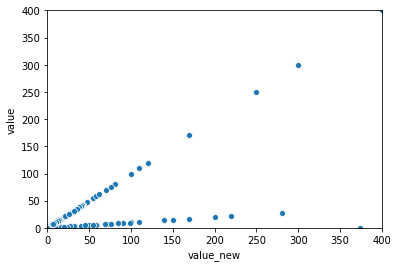

In [366]:
#sns.scatterplot(x=df_values_wunits_old_vs_new.value_new, y=df_values_wunits_old_vs_new.value)
#plt.show()

sns.scatterplot(data=df_values_wunits_old_vs_new, x="value_new", y="value")
plt.ylim(0, 400)
plt.xlim(0, 400)
plt.show()

In [367]:
#df_values_wunits_old_vs_new.where(df_values_wunits_old_vs_new.value < df_values_wunits_old_vs_new.value_new)

print(df_values_wunits_old_vs_new['value'].max())
print(df_values_wunits_old_vs_new['value'].min())
print(df_values_wunits_old_vs_new['value_new'].max())
print(df_values_wunits_old_vs_new['value_new'].min())
df_values_wunits_old_vs_new.loc[df_values_wunits_old_vs_new['value'] > df_values_wunits_old_vs_new['value_new']] 

400.0
0.0
86350.0
0.0


,full_new,value_new,unit_new,full,value,unit,original


In [368]:
water_related_samples = pd.read_csv("../../target/water-related-samples.tsv.gz", sep='\t', compression='gzip')

/Users/marcin/Library/Python/3.7/lib/python/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (0,1,2,3,4,6,7,9,10,11,12,14,16,18,20,21,23,24,26,27,28,30,31,34,35,36,37,42,43,44,45,48,49,50,51,52,53,55,56,57,58,59,60,61,62,63,65,66,67,69,70,71,72,74,75,77,78,79,81,82,83,84,85,88,91) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [369]:
print(water_related_samples.columns)

Index(['tot_diss_nitro', 'salinity_meth', 'tidal_stage', 'num_replicons',
       'nitrate', 'rel_to_oxygen', 'potassium', 'sodium', 'env_package',
       'biomass', 'samp_store_dur', 'conduc', 'propagation',
       'samp_mat_process', 'host_taxid', 'phosphate', 'light_intensity',
       'geo_loc_name', 'tot_depth_water_col', 'tot_carb', 'estimated_size',
       'samp_salinity', 'diss_org_carb', 'phaeopigments', 'host_life_stage',
       'biotic_relationship', 'host_age', 'nitrite', 'ref_biomaterial',
       'isol_growth_condt', 'atmospheric_data', 'density', 'project_name',
       'salinity', 'elev', 'misc_param', 'sulfate', 'slope_aspect',
       'investigation_type', 'collection_date', 'extreme_salinity', 'temp',
       'turbidity', 'suspend_part_matter', 'pressure', 'samp_store_loc',
       'env_broad_scale', 'samp_size', 'diss_carb_dioxide', 'org_nitro',
       'tot_nitro', 'samp_vol_we_dna_ext', 'heavy_metals_meth',
       'oxy_stat_samp', 'env_local_scale', 'redox_potential',
   

In [370]:
#new_salinity = pd.Series(0)#water_related_samples['salinity'].copy()
#new_salinity = new_salinity.repeat(len(water_related_samples['salinity']))

#print(len(water_related_samples['salinity']))
#new_salinity =  pd.Series(np.NAN * len(water_related_samples['salinity']))
#print(len(new_salinity))
#print(type(new_salinity))
#print(water_related_samples.columns)
#water_related_samples['salinity_in_g_per_l'] = new_salinity

water_related_samples.loc[:,'salinity_old'] = np.NAN
#water_related_samples['salinity_old'].astype('object')
water_related_samples.loc[:,'salinity_in_g_per_l'] = np.NAN
#water_related_samples = water_related_samples.assign(industry='yyy')
print(water_related_samples.loc[:,'salinity_in_g_per_l'].isna().sum())
print(water_related_samples.dtypes)#['salinity'])

18615
tot_diss_nitro          object
salinity_meth           object
tidal_stage             object
num_replicons           object
nitrate                 object
                        ...   
taxonomy_name           object
package                 object
norm_env_package        object
salinity_old           float64
salinity_in_g_per_l    float64
Length: 99, dtype: object


In [371]:
water_related_samples.loc[~water_related_samples.loc[:,'salinity'].isna(),'salinity']

304      33.2956 PSU
305      33.2820 PSU
306      33.2574 PSU
307      33.2397 PSU
308      33.3043 PSU
            ...     
18526             33
18527             33
18528             33
18529             33
18530             33
Name: salinity, Length: 5373, dtype: object

In [404]:
total = 0
for i in range(0,df_values_wunits.shape[0]):
    #print(i)
    search = df_values_wunits.full[i]
    print("search *"+search+"*")
#    index = df_values_wunits_old_vs_new.full.str.contains(search).idxmax()
    
    index = df_values_wunits_old_vs_new[df_values_wunits_old_vs_new['full']==search].index.values
    
    print(index)
    print(index[0])
    
    good_unit = False
    if(df_values_wunits_old_vs_new.unit[index[0]] in unit_list_lower):
        good_unit = True
    else:
        print("BAD unit "+df_values_wunits_old_vs_new.unit[index[0]])        
    
    search_orig = df_values_wunits_old_vs_new['original'][index[0]] 
    print("search_orig "+search_orig)
    
    print(df_values_wunits_old_vs_new.full[index[0]])
#   first_index = next((i for i, s in enumerate(water_related_samples['salinity'].str) if search in s), None)
    #first_index = ~(water_related_samples.where(water_related_samples.salinity==search)).isnull().all()
    #print(first_index)
    print(df_values_wunits_old_vs_new.value_new[index[0]])    
    print(str(df_values_wunits_old_vs_new.unit[index[0]]))

    #target_index = water_related_samples['salinity'].str.findall(search)
    #target_index = water_related_samples[water_related_samples['salinity'] == search].index.values
    #target_index.reset_index(drop=True)

    if(df_values_wunits_old_vs_new.value_new[index[0]] != df_values_wunits_old_vs_new.value[index[0]]):
        print("DIFF")
        print(str(df_values_wunits_old_vs_new.value_new[index[0]]))
        print(str(df_values_wunits_old_vs_new.value[index[0]]))

    #print(type(search))
    
    ###isin
    target_index = water_related_samples['salinity'].isin([search_orig])
    print("value_counts "+str(target_index.value_counts()))
    
    ###findall
    #target_index = water_related_samples['salinity'].str.findall(search_orig)
    #target_index[target_index.isna()] = False
    
    #print(target_index)
    
    #seriesObj = target_index.any()
    #columnNames = list(seriesObj[seriesObj == True])
    #print("columnNames")
    #print(columnNames)
    #print(water_related_samples[water_related_samples['salinity'].str.contains(search)])
    
    #print("NA "+str(target_index.isna().sum()))
    
    print("len "+str(len(target_index)))
    #print("len "+str(sum(target_index == True)))
    #print(target_index.sum())
    #print("len "+str(target_index.sum())) #str(target_index.sum()))
    #print("counts "+target_index.value_counts())

    if(good_unit):
        print("GOOD "+str(df_values_wunits_old_vs_new.value_new[index[0]]))
        total = total + 1
        water_related_samples.loc[target_index, 'salinity_in_g_per_l'] = str(df_values_wunits_old_vs_new.value_new[index[0]])
    else:
        print("BAD "+str(df_values_wunits_old_vs_new.value_new[index[0]]))
        water_related_samples.loc[target_index, 'salinity_in_g_per_l'] = np.NAN
    water_related_samples.loc[target_index, 'salinity_old'] = str(df_values_wunits_old_vs_new.value[index[0]])
    #water_related_samples.loc[target_index,'salinity_in_g_per_l'] = str(df_values_wunits_old_vs_new.value_new[index[0]])
    #new_salinity[target_index] = str(df_values_wunits_old_vs_new.value_new[index[0]])

    #new_salinity.update(new_salinity.loc[target_index, 'value'] * 1000)
        

print("total "+str(total))

search *55 g/l*
[0]
0
search_orig 55 g/L
55 g/l
55.0
g/l
value_counts False    18615
Name: salinity, dtype: int64
len 18615
GOOD 55.0
search *400g/l*
[1]
1
search_orig 400g/L
400g/l
400.0
g/l
value_counts False    18615
Name: salinity, dtype: int64
len 18615
GOOD 400.0
search *70g/l*
[2]
2
search_orig 70g/L
70g/l
70.0
g/l
value_counts False    18615
Name: salinity, dtype: int64
len 18615
GOOD 70.0
search *110g/l*
[3]
3
search_orig 110g/L
110g/l
110.0
g/l
value_counts False    18615
Name: salinity, dtype: int64
len 18615
GOOD 110.0
search *100g/l*
[4]
4
search_orig 100g/L
100g/l
100.0
g/l
value_counts False    18615
Name: salinity, dtype: int64
len 18615
GOOD 100.0
search *1%*
[5]
5
BAD unit 
search_orig 1%
1%
1.0

value_counts False    18615
Name: salinity, dtype: int64
len 18615
BAD 1.0
search *0.05 psu*
[6]
6
search_orig 0.05 psu
0.05 psu
0.05
psu
value_counts False    18615
Name: salinity, dtype: int64
len 18615
GOOD 0.05
search *0.19 psu*
[7]
7
search_orig 0.19 psu
0.19 psu
0.19
ps

value_counts False    18615
Name: salinity, dtype: int64
len 18615
GOOD 0.3
search *3.01 g/dm3*
[60]
60
search_orig 3.01 g/dm3
3.01 g/dm3
3.01
g/dm3
value_counts False    18615
Name: salinity, dtype: int64
len 18615
GOOD 3.01
search *7.5 g/dm3*
[61]
61
search_orig 7.5 g/dm3
7.5 g/dm3
7.5
g/dm3
value_counts False    18615
Name: salinity, dtype: int64
len 18615
GOOD 7.5
search *6.87 g/dm3*
[62]
62
search_orig 6.87 g/dm3
6.87 g/dm3
6.87
g/dm3
value_counts False    18615
Name: salinity, dtype: int64
len 18615
GOOD 6.87
search *7.1 g/dm3*
[63]
63
search_orig 7.1 g/dm3
7.1 g/dm3
7.1
g/dm3
value_counts False    18615
Name: salinity, dtype: int64
len 18615
GOOD 7.1
search *0.4 g/dm3*
[64]
64
search_orig 0.4 g/dm3
0.4 g/dm3
0.4
g/dm3
value_counts False    18615
Name: salinity, dtype: int64
len 18615
GOOD 0.4
search *33.56 psu*
[65]
65
search_orig 33.56 psu
33.56 psu
33.56
psu
value_counts False    18615
Name: salinity, dtype: int64
len 18615
GOOD 33.56
search *37.4 psu*
[66]
66
search_orig 37.4

33.52
psu
value_counts False    18615
Name: salinity, dtype: int64
len 18615
GOOD 33.52
search *41.69 psu*
[118]
118
search_orig 41.69 psu
41.69 psu
41.69
psu
value_counts False    18615
Name: salinity, dtype: int64
len 18615
GOOD 41.69
search *5.722 psu*
[119]
119
search_orig 5.722 psu
5.722 psu
5.722
psu
value_counts False    18615
Name: salinity, dtype: int64
len 18615
GOOD 5.722
search *37.12 psu*
[120]
120
search_orig 37.12 psu
37.12 psu
37.12
psu
value_counts False    18615
Name: salinity, dtype: int64
len 18615
GOOD 37.12
search *33.89 psu*
[121]
121
search_orig 33.89 psu
33.89 psu
33.89
psu
value_counts False    18615
Name: salinity, dtype: int64
len 18615
GOOD 33.89
search *38.129 psu*
[122]
122
search_orig 38.129 psu
38.129 psu
38.129
psu
value_counts False    18615
Name: salinity, dtype: int64
len 18615
GOOD 38.129
search *37.28 psu*
[123]
123
search_orig 37.28 psu
37.28 psu
37.28
psu
value_counts False    18615
Name: salinity, dtype: int64
len 18615
GOOD 37.28
search *32.36

value_counts False    18615
Name: salinity, dtype: int64
len 18615
GOOD 24.72
search *22.73 psu*
[174]
174
search_orig 22.73 psu
22.73 psu
22.73
psu
value_counts False    18615
Name: salinity, dtype: int64
len 18615
GOOD 22.73
search *41.67 psu*
[175]
175
search_orig 41.67 psu
41.67 psu
41.67
psu
value_counts False    18615
Name: salinity, dtype: int64
len 18615
GOOD 41.67
search *35.97 psu*
[176]
176
search_orig 35.97 psu
35.97 psu
35.97
psu
value_counts False    18615
Name: salinity, dtype: int64
len 18615
GOOD 35.97
search *32.97 psu*
[177]
177
search_orig 32.97 psu
32.97 psu
32.97
psu
value_counts False    18615
Name: salinity, dtype: int64
len 18615
GOOD 32.97
search *22.71 psu*
[178]
178
search_orig 22.71 psu
22.71 psu
22.71
psu
value_counts False    18615
Name: salinity, dtype: int64
len 18615
GOOD 22.71
search *41.62 psu*
[179]
179
search_orig 41.62 psu
41.62 psu
41.62
psu
value_counts False    18615
Name: salinity, dtype: int64
len 18615
GOOD 41.62
search *37.37 psu*
[180]
180

value_counts False    18615
Name: salinity, dtype: int64
len 18615
GOOD 35.34
search *26.57 psu*
[259]
259
search_orig 26.57 psu
26.57 psu
26.57
psu
value_counts False    18615
Name: salinity, dtype: int64
len 18615
GOOD 26.57
search *33.57 psu*
[260]
260
search_orig 33.57 psu
33.57 psu
33.57
psu
value_counts False    18615
Name: salinity, dtype: int64
len 18615
GOOD 33.57
search *17.15 psu*
[261]
261
search_orig 17.15 psu
17.15 psu
17.15
psu
value_counts False    18615
Name: salinity, dtype: int64
len 18615
GOOD 17.15
search *7.5 g/l*
[262]
262
search_orig 7.5 g/L
7.5 g/l
7.5
g/l
value_counts False    18615
Name: salinity, dtype: int64
len 18615
GOOD 7.5
search *5.96 psu*
[263]
263
search_orig 5.96 psu
5.96 psu
5.96
psu
value_counts False    18615
Name: salinity, dtype: int64
len 18615
GOOD 5.96
search *31.36 psu*
[264]
264
search_orig 31.36 psu
31.36 psu
31.36
psu
value_counts False    18615
Name: salinity, dtype: int64
len 18615
GOOD 31.36
search *31.17 psu*
[265]
265
search_orig 31

search *13.89 psu*
[341]
341
search_orig 13.89 psu
13.89 psu
13.89
psu
value_counts False    18615
Name: salinity, dtype: int64
len 18615
GOOD 13.89
search *20.96 psu*
[342]
342
search_orig 20.96 psu
20.96 psu
20.96
psu
value_counts False    18615
Name: salinity, dtype: int64
len 18615
GOOD 20.96
search *17.54 psu*
[343]
343
search_orig 17.54 psu
17.54 psu
17.54
psu
value_counts False    18615
Name: salinity, dtype: int64
len 18615
GOOD 17.54
search *35.31 psu*
[344]
344
search_orig 35.31 psu
35.31 psu
35.31
psu
value_counts False    18615
Name: salinity, dtype: int64
len 18615
GOOD 35.31
search *19.58 psu*
[345]
345
search_orig 19.58 psu
19.58 psu
19.58
psu
value_counts False    18615
Name: salinity, dtype: int64
len 18615
GOOD 19.58
search *23.1 psu*
[346]
346
search_orig 23.1 psu
23.1 psu
23.1
psu
value_counts False    18615
Name: salinity, dtype: int64
len 18615
GOOD 23.1
search *9.61 psu*
[347]
347
search_orig 9.61 psu
9.61 psu
9.61
psu
value_counts False    18615
Name: salinity, 

value_counts False    18615
Name: salinity, dtype: int64
len 18615
GOOD 0.96
search *18.4 psu*
[401]
401
search_orig 18.4 psu
18.4 psu
18.4
psu
value_counts False    18615
Name: salinity, dtype: int64
len 18615
GOOD 18.4
search *33.92 psu*
[402]
402
search_orig 33.92 psu
33.92 psu
33.92
psu
value_counts False    18615
Name: salinity, dtype: int64
len 18615
GOOD 33.92
search *6.08 psu*
[403]
403
search_orig 6.08 psu
6.08 psu
6.08
psu
value_counts False    18615
Name: salinity, dtype: int64
len 18615
GOOD 6.08
search *18.87 psu*
[404]
404
search_orig 18.87 psu
18.87 psu
18.87
psu
value_counts False    18615
Name: salinity, dtype: int64
len 18615
GOOD 18.87
search *34.19 psu*
[405]
405
search_orig 34.19 psu
34.19 psu
34.19
psu
value_counts False    18615
Name: salinity, dtype: int64
len 18615
GOOD 34.19
search *19.67 psu*
[406]
406
search_orig 19.67 psu
19.67 psu
19.67
psu
value_counts False    18615
Name: salinity, dtype: int64
len 18615
GOOD 19.67
search *41.77 psu*
[407]
407
search_ori

value_counts False    18615
Name: salinity, dtype: int64
len 18615
GOOD 5.7
search *32.27 psu*
[462]
462
search_orig 32.27 psu
32.27 psu
32.27
psu
value_counts False    18615
Name: salinity, dtype: int64
len 18615
GOOD 32.27
search *26.08 psu*
[463]
463
search_orig 26.08 psu
26.08 psu
26.08
psu
value_counts False    18615
Name: salinity, dtype: int64
len 18615
GOOD 26.08
search *31.91 psu*
[464]
464
search_orig 31.91 psu
31.91 psu
31.91
psu
value_counts False    18615
Name: salinity, dtype: int64
len 18615
GOOD 31.91
search *3.63 psu*
[465]
465
search_orig 3.63 psu
3.63 psu
3.63
psu
value_counts False    18615
Name: salinity, dtype: int64
len 18615
GOOD 3.63
search *21.4-27.6%*
[466]
466
BAD unit 
search_orig 21.4-27.6%
21.4-27.6%
nan

DIFF
nan
nan
value_counts False    18613
True         2
Name: salinity, dtype: int64
len 18615
BAD nan
search *15.82 psu*
[467]
467
search_orig 15.82 psu
15.82 psu
15.82
psu
value_counts False    18615
Name: salinity, dtype: int64
len 18615
GOOD 15.82
se

value_counts False    18615
Name: salinity, dtype: int64
len 18615
GOOD 19.61
search *20.95 psu*
[522]
522
search_orig 20.95 psu
20.95 psu
20.95
psu
value_counts False    18615
Name: salinity, dtype: int64
len 18615
GOOD 20.95
search *27.64 psu*
[523]
523
search_orig 27.64 psu
27.64 psu
27.64
psu
value_counts False    18615
Name: salinity, dtype: int64
len 18615
GOOD 27.64
search *13.8 psu*
[524]
524
search_orig 13.8 psu
13.8 psu
13.8
psu
value_counts False    18613
True         2
Name: salinity, dtype: int64
len 18615
GOOD 13.8
search *0.81 psu*
[525]
525
search_orig 0.81 psu
0.81 psu
0.81
psu
value_counts False    18615
Name: salinity, dtype: int64
len 18615
GOOD 0.81
search *0.38 psu*
[526]
526
search_orig 0.38 psu
0.38 psu
0.38
psu
value_counts False    18615
Name: salinity, dtype: int64
len 18615
GOOD 0.38
search *0.41 psu*
[527]
527
search_orig 0.41 psu
0.41 psu
0.41
psu
value_counts False    18615
Name: salinity, dtype: int64
len 18615
GOOD 0.41
search *14.77 psu*
[528]
528
sear

search *34.999 psu*
[579]
579
search_orig 34.999 psu
34.999 psu
34.999
psu
value_counts False    18615
Name: salinity, dtype: int64
len 18615
GOOD 34.999
search *0–15% (optimum at 3.5%)*
[580]
580
BAD unit (optimum at 3.5%)
search_orig 0–15% (optimum at 3.5%)
0–15% (optimum at 3.5%)
nan
(optimum at 3.5%)
DIFF
nan
nan
value_counts False    18615
Name: salinity, dtype: int64
len 18615
BAD nan
search *76%*
[581]
581
BAD unit 
search_orig 76%
76%
76.0

value_counts False    18615
Name: salinity, dtype: int64
len 18615
BAD 76.0
search *27.02145 psu*
[582]
582
search_orig 27.02145 psu
27.02145 psu
27.02145
psu
value_counts False    18615
Name: salinity, dtype: int64
len 18615
GOOD 27.02145
search *35.3 psu*
[583]
583
search_orig 35.3 psu
35.3 psu
35.3
psu
value_counts False    18615
Name: salinity, dtype: int64
len 18615
GOOD 35.3
search *33.703 psu*
[584]
584
search_orig 33.703 psu
33.703 psu
33.703
psu
value_counts False    18615
Name: salinity, dtype: int64
len 18615
GOOD 33.703
search *3

value_counts False    18615
Name: salinity, dtype: int64
len 18615
GOOD 32.7616
search *5.4 g/l*
[638]
638
search_orig 5.4 g/L
5.4 g/l
5.4
g/l
value_counts False    18615
Name: salinity, dtype: int64
len 18615
GOOD 5.4
search *34.515 psu*
[639]
639
search_orig 34.515 psu
34.515 psu
34.515
psu
value_counts False    18615
Name: salinity, dtype: int64
len 18615
GOOD 34.515
search *32.77475 psu*
[640]
640
search_orig 32.77475 psu
32.77475 psu
32.77475
psu
value_counts False    18615
Name: salinity, dtype: int64
len 18615
GOOD 32.77475
search *1.7 percent (w/v)*
[641]
641
search_orig 1.7 percent (w/v)
1.7 percent (w/v)
17.0
percent (w/v)
DIFF
17.0
1.7
value_counts False    18615
Name: salinity, dtype: int64
len 18615
GOOD 17.0
search *35.353 psu*
[642]
642
search_orig 35.353 psu
35.353 psu
35.353
psu
value_counts False    18615
Name: salinity, dtype: int64
len 18615
GOOD 35.353
search *34.704 psu*
[643]
643
search_orig 34.704 psu
34.704 psu
34.704
psu
value_counts False    18615
Name: salin

value_counts False    18615
Name: salinity, dtype: int64
len 18615
GOOD 250.0
search *{0.02} {%}*
[698]
698
BAD unit {%}
search_orig {0.02} {%}
{0.02} {%}
nan
{%}
DIFF
nan
nan
value_counts False    18615
Name: salinity, dtype: int64
len 18615
BAD nan
search *9.8 g/l*
[699]
699
search_orig 9.8 g/L
9.8 g/l
9.8
g/l
value_counts False    18615
Name: salinity, dtype: int64
len 18615
GOOD 9.8
search *34.371 psu*
[700]
700
search_orig 34.371 psu
34.371 psu
34.371
psu
value_counts False    18615
Name: salinity, dtype: int64
len 18615
GOOD 34.371
search *26 psu*
[701]
701
search_orig 26 psu
26 psu
26.0
psu
value_counts False    18615
Name: salinity, dtype: int64
len 18615
GOOD 26.0
search *10.1 g/l*
[702]
702
search_orig 10.1 g/L
10.1 g/l
10.1
g/l
value_counts False    18615
Name: salinity, dtype: int64
len 18615
GOOD 10.1
search *38%*
[703]
703
BAD unit 
search_orig 38%
38%
38.0

value_counts False    18615
Name: salinity, dtype: int64
len 18615
BAD 38.0
search *8.6 g/l*
[704]
704
search_orig 

18590
18615


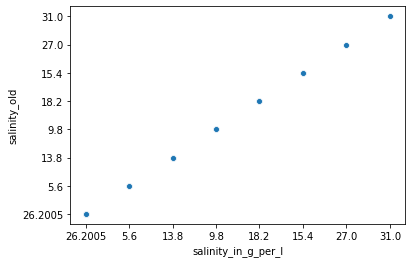

In [405]:
print((~water_related_samples.loc[:,'salinity_in_g_per_l'].isna()).sum())
print((~water_related_samples.loc[:,'salinity_old'].isna()).sum())
sns.scatterplot(data=water_related_samples, x="salinity_in_g_per_l", y="salinity_old")
#plt.ylim(0, 400)
#plt.xlim(0, 400)
plt.show()